# Heuristic algorithm to minimize AoI 
## By Weiqi Wang, Jin Xu

In [9]:
import numpy as np
import networkx as nx 
import itertools
import copy
import pandas as pd
import matplotlib.pyplot as plt

import aoi_utils

## Define sample graphs using adjacency matrix

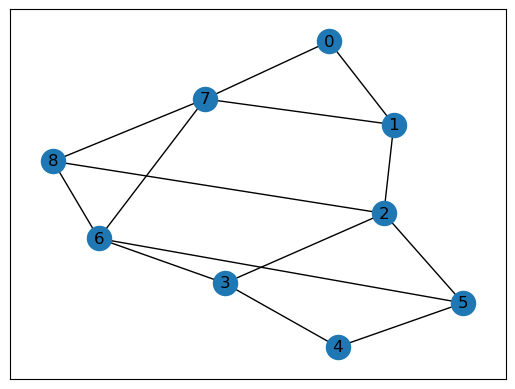

In [10]:

#test the AoI of the route given by CPP 

graph4 = [[0,0,1,0],
          [0,0,1,1],
          [1,1,0,1],
          [0,1,1,0]]


graph5 = [[0,1,0,0,0],
          [1,0,0,0,1],
          [0,0,0,1,1],
          [0,0,1,0,1],
          [0,1,1,1,0]]



# g = np.array([[0,1,1,1,1],
#           [1,0,1,0,0],
#           [1,1,0,0,0],
#           [1,0,0,0,1],
#           [1,0,0,1,0]])
# g_array = np.array([[0,1,1,1,1,1],[1,0,1,0,0,0],[1,1,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0],[1,0,0,0,0,0]])

# n_edges = 30
# g_array = np.zeros((n_edges,n_edges))
# for i in range(n_edges):
#     if i == 0:
#         g_array[0,1:] = np.ones((1,n_edges-1))
#     elif i == 1:
#         g_array[i,0] = 1
#         g_array[i,2] = 1
#     elif i == 2:
#         g_array[i,0] = 1
#         g_array[i,1] = 1        
#     else:
#         g_array[i,0] = 1
g_array =     np.array([[0, 4, 0, 0, 0, 0, 0, 8, 0], 
                        [4, 0, 8, 0, 0, 0, 0, 11, 0], 
                        [0, 8, 0, 7, 0, 4, 0, 0, 2], 
                        [0, 0, 7, 0, 9, 0, 14, 0, 0], 
                        [0, 0, 0, 9, 0, 10, 0, 0, 0], 
                        [0, 0, 4, 0, 10, 0, 2, 0, 0], 
                        [0, 0, 0, 14, 0, 2, 0, 1, 6], 
                        [8, 11, 0, 0, 0, 0, 1, 0, 7], 
                        [0, 0, 2, 0, 0, 0, 6, 7, 0] 
                    ]); 

# g =               np.array( [[0, 3, 1, 0, 5, 0], 
#                         [3, 0, 0, 1, 0, 6], 
#                         [1, 0, 0, 0, 2, 0], 
#                         [0, 1, 0, 0, 0, 1], 
#                         [5, 0, 2, 0, 0, 4], 
#                         [0, 6, 0, 1, 4, 0],     
#                     ]); 

g = nx.from_numpy_array(g_array)
g = nx.MultiGraph(g)
nx.draw_networkx(g, with_labels=True) 

In [11]:
print(aoi_utils.sum_edges(g))

93


## Add edges to convert the original graph to Eulerian graph. Then use Fleury's algorithm and heuristic AoI algorithem to get a patrol route of the graph, and compare the AoI.

In [12]:
g_aug = aoi_utils.smallest_eularian_graph(g)
source = 0
naive_circuit = [u for u,v in nx.eulerian_circuit(g_aug, source)] + [source]
heuristic_circuit = aoi_utils.heuristic_AoI_eulerian_circuit(g_aug, source)
random_eulerian_circuit = aoi_utils.random_eulerian_circuit(g_aug, source)
print(g_aug.edges.data('weight'))
print(naive_circuit)
print('CPP_AoI', aoi_utils.AoI_Compute(g_array,naive_circuit)) 
print(heuristic_circuit)
print('Heu_AoI', aoi_utils.AoI_Compute(g_array,heuristic_circuit)) 

[(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 3, 7), (2, 5, 4), (2, 5, 4), (2, 8, 2), (2, 8, 2), (3, 4, 9), (3, 6, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), (6, 8, 6), (7, 8, 7)]
[0, 7, 8, 2, 8, 6, 5, 2, 5, 4, 3, 2, 3, 6, 7, 1, 2, 1, 0]
AOI of the route
5178.842105263159
CPP_AoI 5178.842105263159
[0, 7, 6, 3, 2, 8, 6, 5, 2, 1, 7, 8, 2, 3, 4, 5, 2, 1, 0]
AOI of the route
4712.631578947368
Heu_AoI 4712.631578947368


## Show all edges in the augmented graph

In [13]:
print(g_aug.edges.data('weight'))

[(0, 1, 4), (0, 7, 8), (1, 2, 8), (1, 2, 8), (1, 7, 11), (2, 3, 7), (2, 3, 7), (2, 5, 4), (2, 5, 4), (2, 8, 2), (2, 8, 2), (3, 4, 9), (3, 6, 14), (4, 5, 10), (5, 6, 2), (6, 7, 1), (6, 8, 6), (7, 8, 7)]


## Duplicated graph

In [14]:
g_dup = aoi_utils.add_augmenting_path_to_graph(g, g.edges())
print('route_length',aoi_utils.sum_edges(g_dup))
route_dup = [u for u,v in nx.eulerian_circuit(g_dup, source)] + [source]
print('Dup_AoI', aoi_utils.AoI_Compute(g_array,route_dup))

route_length 186
AOI of the route
7219.37634408602
Dup_AoI 7219.37634408602


## Test the algorithm using 100 random runs

In [15]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.heuristic_AoI_eulerian_circuit(g_aug, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
    print(aoi_utils.AoI_Compute(g_array,heuristic_circuit))
print(s/100)

4789.538011695907
4848.497076023393
4773.043859649123
4770.596491228071
4856.1140350877195
4703.0
4741.894736842105
4836.789473684211
4773.622807017544
4789.538011695907
4703.078947368421
4751.558479532165
4702.8421052631575
4714.6578947368425
4702.8421052631575
4702.921052631579
4782.6988304093575
4703.0
4857.292397660818
4774.30701754386
4703.078947368421
4712.631578947368
4789.728070175439
4848.6140350877195
4790.976608187134
4765.988304093568
4702.8421052631575
4753.970760233919
4772.7807017543855
4789.538011695907
4780.523391812866
4764.622807017544
4714.6578947368425
4851.6140350877195
4856.1140350877195
4803.043859649123
4780.523391812866
4703.473684210527
4834.964912280701
4779.2192982456145
4790.976608187134
4773.043859649123
4774.30701754386
4703.473684210527
4711.4473684210525
4821.309941520467
4769.590643274854
4856.1140350877195
4714.394736842105
4774.30701754386
4742.149122807017
4848.497076023393
4703.078947368421
4713.763157894737
4845.80701754386
4803.043859649123
4782

In [8]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.random_eulerian_circuit(g_aug, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
print(s/100)

4991.395555555557


In [11]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.random_eulerian_circuit(g_dup, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
print(s/100)

6563.536917562724


In [16]:
s = 0
for i in range(100):
    heuristic_circuit = aoi_utils.heuristic_AoI_eulerian_circuit(g_dup, source)
    s += aoi_utils.AoI_Compute(g_array,heuristic_circuit) 
    print(aoi_utils.AoI_Compute(g_array,heuristic_circuit))
print(s/100)

5322.913978494624
5507.1720430107525
4912.268817204302
4909.173835125448
4876.822580645161
5371.571684587813
5237.883512544803
5039.6577060931895
5018.55017921147
4991.12724014337
5020.6899641577065
5125.517921146954
5156.948028673835
5161.455197132617
5465.021505376344
5149.786738351254
5322.913978494624
5306.336917562724
4885.591397849463
5110.940860215054
5153.313620071684
5163.559139784947
5016.903225806452
4913.1505376344085
4941.0053763440865
5225.356630824373
4962.856630824373
5321.759856630824
5125.517921146954
5052.682795698925
5449.05376344086
5010.688172043011
4745.844086021506
4982.91935483871
4997.539426523298
5404.281362007168
5170.967741935484
5077.055555555557
5441.625448028673
5172.465949820788
5085.6720430107525
5037.5268817204305
5123.125448028674
5113.16129032258
5159.840501792116
5280.915770609319
5477.863799283154
4806.4946236559135
4773.387096774193
5278.31541218638
4980.356630824373
4870.258064516129
5526.618279569893
4849.695340501793
4912.268817204301
5314.109